Author: Bruno Gonçalves Pereira, Oceanographic Institute, University of Sao Paulo

In [2]:
import numpy as np
import xarray as xr 
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [3]:
### cartopy definitions

land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

WIND_GLO_WIND_L4_REP_OBSERVATIONS_012_006

In [6]:
''' Building Dataset'''

source = xr.open_mfdataset('/home/bruno/git/CMEMS/wind_data/wind*') #serie cmems monthly composite

source = source.reindex()

source.close()


In [9]:
#source.attrs
#source.var

In [10]:
print(source.time)

<xarray.DataArray 'time' (time: 32071)>
array(['1998-01-01T18:00:00.000000000', '1998-01-02T00:00:00.000000000',
       '1998-01-02T06:00:00.000000000', ..., '2019-12-31T06:00:00.000000000',
       '2019-12-31T12:00:00.000000000', '2019-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01T18:00:00 ... 2019-12-31T18:00:00
Attributes:
    long_name:            time
    authority:            CF-1.7
    axis:                 T
    _ChunkSizes:          1024
    _CoordinateAxisType:  Time
    valid_min:            859074.0
    valid_max:            867810.0
    standard_name:        time


In [21]:
#definindo variavéis a partir do arquivo

lat = source.lat
lon = source.lon

v_s = source.northward_wind.groupby("time.season").mean() #vetores

u_s= source.eastward_wind.groupby("time.season").mean()  #vetores

speed_s = source.wind_speed.groupby("time.season").mean()

#wind_stress_magnitude = wind_data.wind_stress_magnitude.groupby("time.season").mean()

wind_scurl = source.wind_stress_curl.groupby("time.season").mean()

source.close()

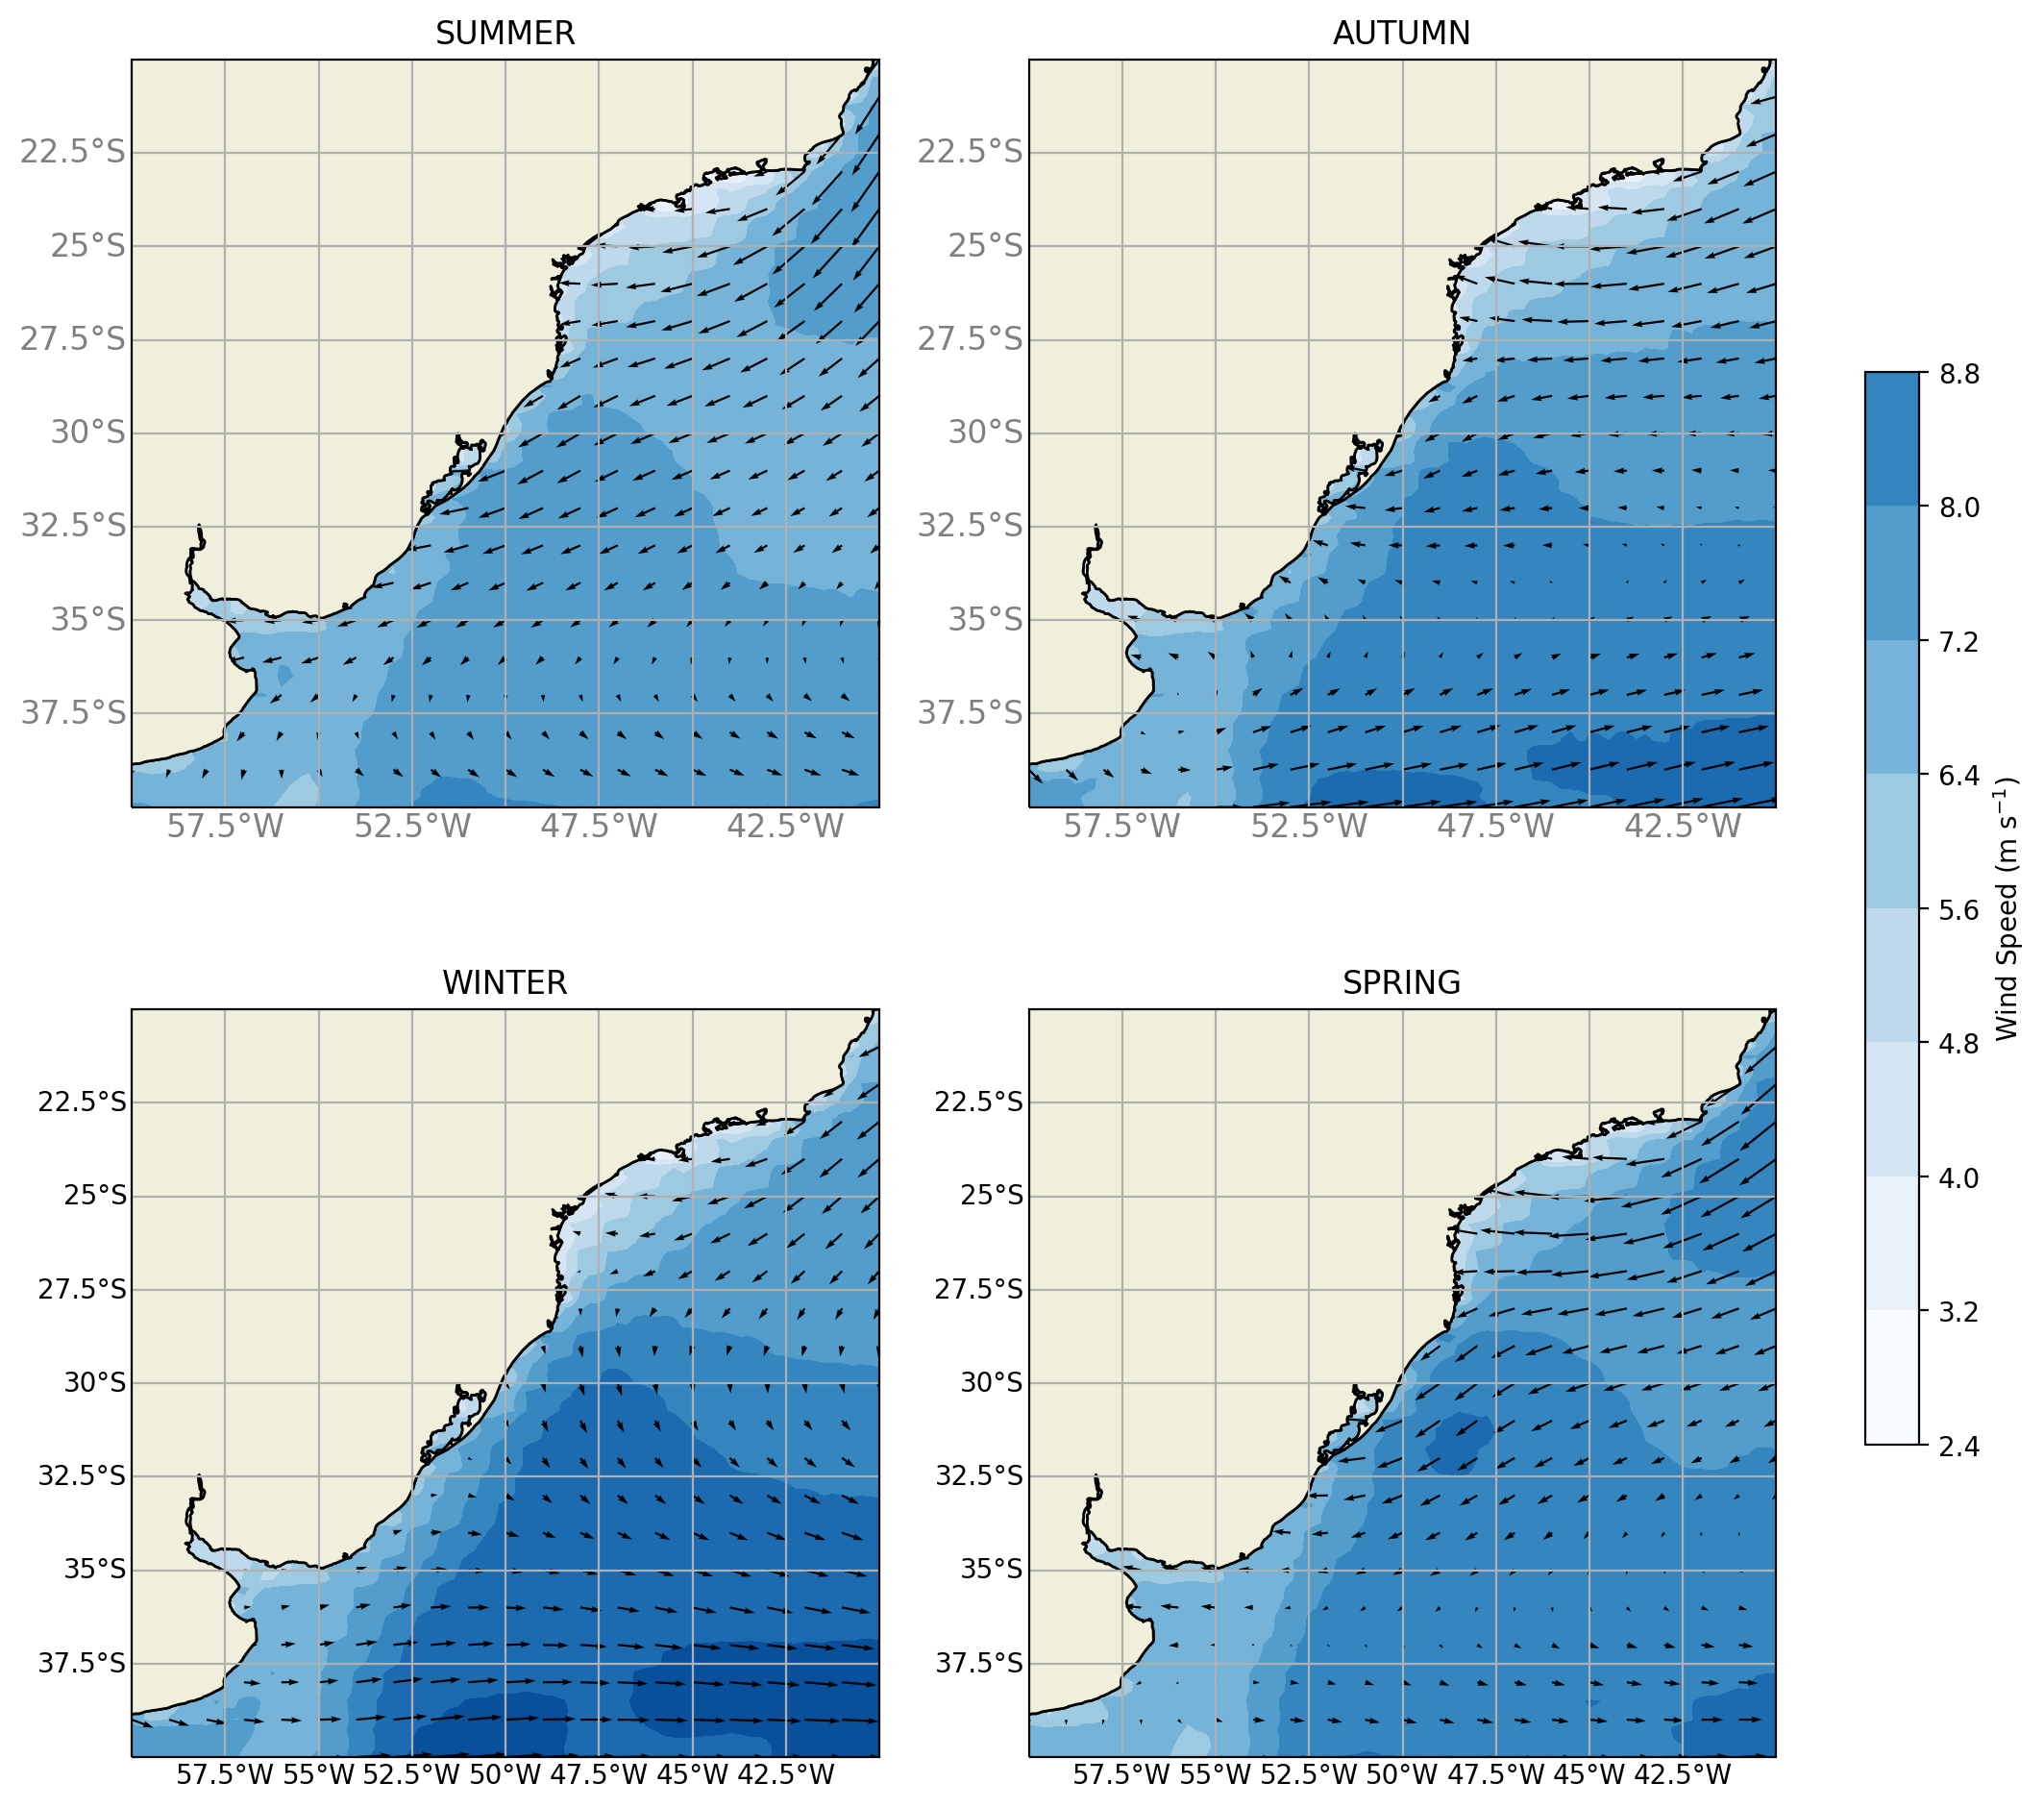

In [20]:
from matplotlib import gridspec

### CARTOPY SUBPLOT ####

#%%capture

fig1 = plt.figure(figsize=(12, 12), dpi=200)

gs  = gridspec.GridSpec(2, 2)

v = 4


# SUMMER - DJF

ax = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_summer = plt.contourf(lon, lat, speed_s.sel(season='DJF'), vmin = 3, vmax=11, cmap='Blues')
ax.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax.add_feature(land_poly)
g = ax.gridlines(draw_labels=True)
g.xlabels_top= False
g.ylabels_right = False
g.xlabel_style = {'size': 12, 'color': 'gray'}
g.ylabel_style = {'size': 12, 'color': 'gray'}
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='DJF').values[::v,::v], v_s.sel(season='DJF').values[::v,::v])
#cbar=plt.colorbar(wind_summer,ticks=np.linspace(0,15,15),format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')

plt.title('SUMMER')

# AUTUMN - MAM

ax1 = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_autumn = plt.contourf(lon, lat, speed_s.sel(season='MAM'), vmin = 3, vmax=11, cmap='Blues')
ax1.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax1.add_feature(land_poly)
g1 = ax1.gridlines(draw_labels=True)
g1.xlabels_top= False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'gray'}
g1.ylabel_style = {'size': 12, 'color': 'gray'}
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='MAM').values[::v,::v] , v_s.sel(season='MAM').values[::v,::v])
#cbar=plt.colorbar(wind_autumn,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('AUTUMN')

### WINTER - JJA ####

ax2 = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_winter = plt.contourf(lon, lat, speed_s.sel(season='JJA'), vmin = 3, vmax=11, cmap='Blues')
ax2.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax2.add_feature(land_poly)
g2 = ax2.gridlines(draw_labels=True)
g2.xlabels_top= False
g2.ylabels_right = False
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='JJA').values[::v,::v] , v_s.sel(season='JJA').values[::v,::v])
#cbar=plt.colorbar(wind_winter,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('WINTER')

### Figure SPRING - SON ####

ax3 = plt.subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=0.0))
wind_spring = plt.contourf(lon, lat, speed_s.sel(season='SON'), vmin = 3, vmax=11, cmap='Blues')
ax3.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax3.add_feature(land_poly)
g3 = ax3.gridlines(draw_labels=True)
g3.xlabels_top= False
g3.ylabels_right = False
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='SON').values[::v,::v] , v_s.sel(season='SON').values[::v,::v])
#cbar=plt.colorbar(wind_spring,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('SPRING')

cbar = fig1.colorbar(wind_summer, ax=[ax, ax1, ax2, ax3], fraction=0.03)
cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.show()

wind s curl

/home/bruno/miniconda3/envs/ocean/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


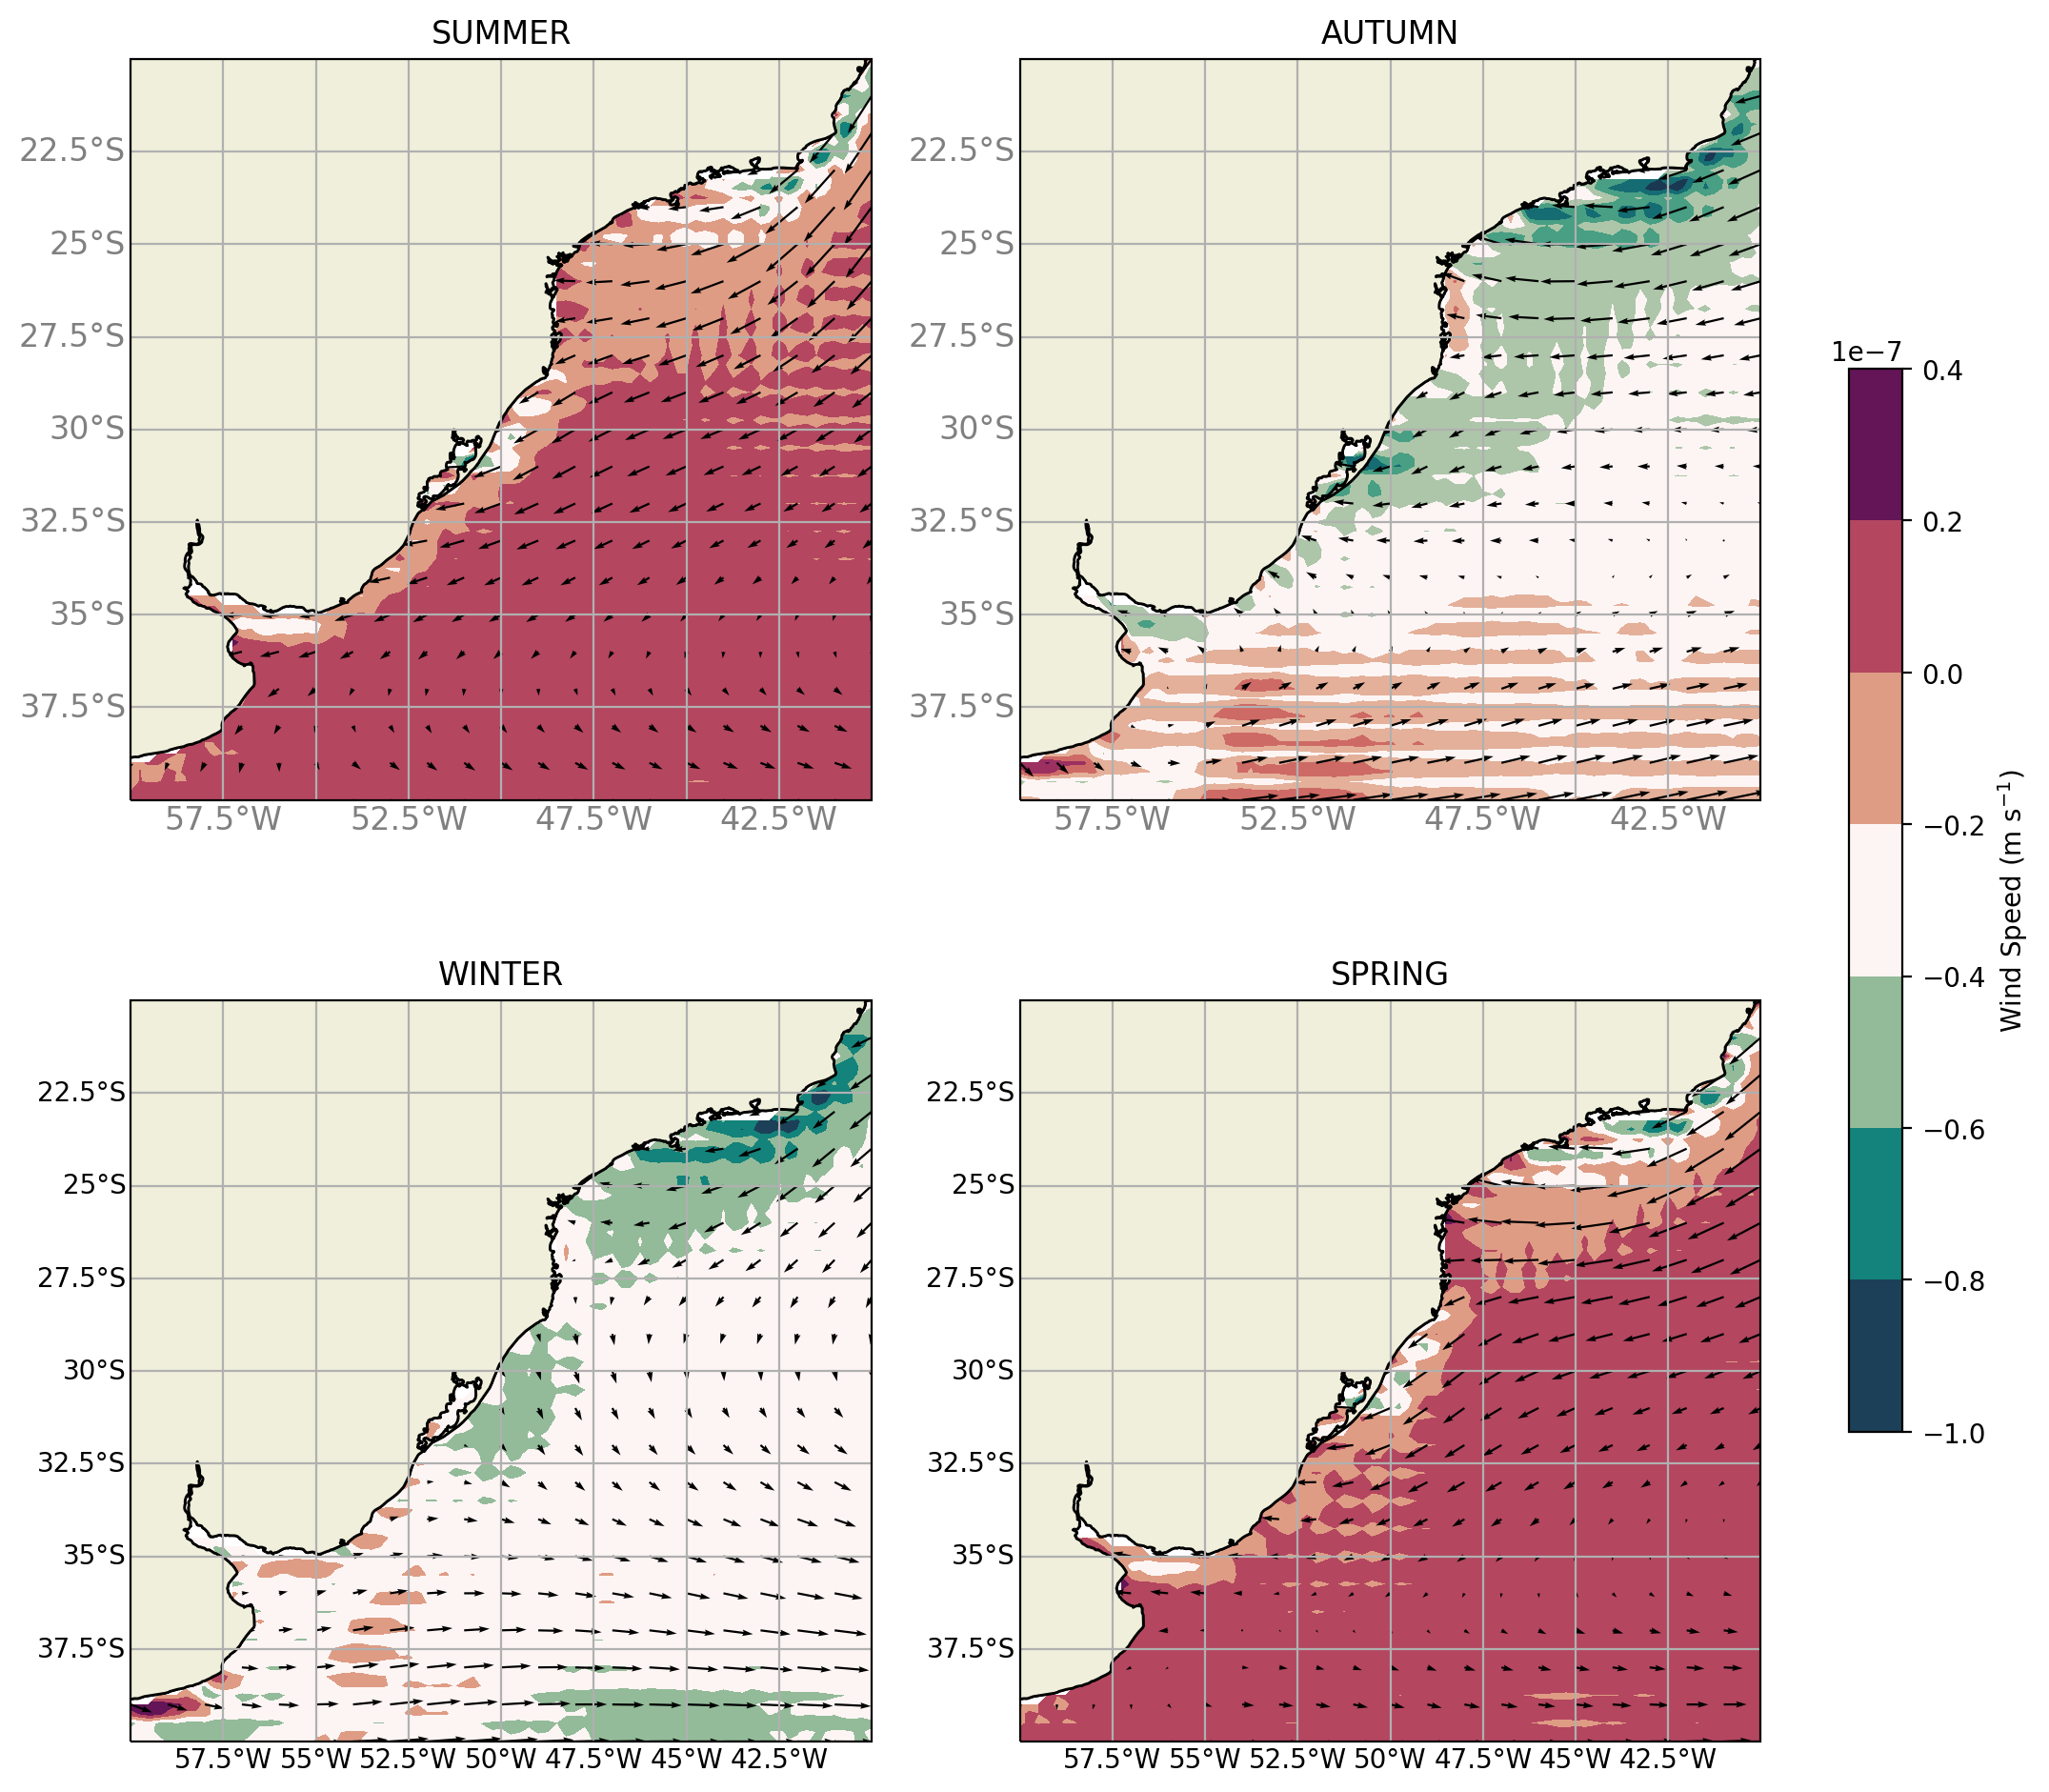

In [38]:
from matplotlib import gridspec

### CARTOPY SUBPLOT ####

#%%capture

fig1 = plt.figure(figsize=(12, 12), dpi=200)

gs  = gridspec.GridSpec(2, 2)

v = 4


# SUMMER - DJF

ax = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_summer = plt.contourf(lon, lat, wind_scurl.sel(season='DJF'), cmap=cmo.cm.curl, robust=True)
ax.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax.add_feature(land_poly)
g = ax.gridlines(draw_labels=True)
g.xlabels_top= False
g.ylabels_right = False
g.xlabel_style = {'size': 12, 'color': 'gray'}
g.ylabel_style = {'size': 12, 'color': 'gray'}
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='DJF').values[::v,::v], v_s.sel(season='DJF').values[::v,::v])
#cbar=plt.colorbar(wind_summer,ticks=np.linspace(0,15,15),format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')

plt.title('SUMMER')

# AUTUMN - MAM

ax1 = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_autumn = plt.contourf(lon, lat, wind_scurl.sel(season='MAM'), cmap=cmo.cm.curl, robust=True)
ax1.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax1.add_feature(land_poly)
g1 = ax1.gridlines(draw_labels=True)
g1.xlabels_top= False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'gray'}
g1.ylabel_style = {'size': 12, 'color': 'gray'}
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='MAM').values[::v,::v] , v_s.sel(season='MAM').values[::v,::v])
#cbar=plt.colorbar(wind_autumn,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('AUTUMN')

### WINTER - JJA ####

ax2 = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_winter = plt.contourf(lon, lat, wind_scurl.sel(season='JJA'), cmap=cmo.cm.curl, robust=True)
ax2.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax2.add_feature(land_poly)
g2 = ax2.gridlines(draw_labels=True)
g2.xlabels_top= False
g2.ylabels_right = False
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='JJA').values[::v,::v] , v_s.sel(season='JJA').values[::v,::v])
#cbar=plt.colorbar(wind_winter,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('WINTER')

### Figure SPRING - SON ####

ax3 = plt.subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=0.0))
wind_spring = plt.contourf(lon, lat, wind_scurl.sel(season='SON'), cmap= cmo.cm.curl, robust=True)
ax3.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax3.add_feature(land_poly)
g3 = ax3.gridlines(draw_labels=True)
g3.xlabels_top= False
g3.ylabels_right = False
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='SON').values[::v,::v] , v_s.sel(season='SON').values[::v,::v])
#cbar=plt.colorbar(wind_spring,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('SPRING')

cbar = fig1.colorbar(wind_summer, ax=[ax, ax1, ax2, ax3], fraction=0.03)
cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.show()